In [2]:
# Import Pandas library
import pandas as pd
import csv
import gzip
import json

# Replace 'your_file_path' with the path to your CSV file in Google Drive
file_path = 'Electronics_5.json.gz'
selected_product = 'smartphone'


def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    if selected_product not in d.get('reviewText',''):
        continue
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF(file_path)

In [4]:
df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5.0,12,True,"01 3, 2015",ALCFF9LR3DMSM,1061861740,{'Color:': ' Black'},LukeIamYoFatha,This one is the real deal for the Nexus 5. Wo...,Works perfectly and picture quality is amazing...,1420243200,NaN
1,5.0,2,True,"11 26, 2012",A2VYOIAZMZ38CO,106171327X,NaN,M. Jaworski,I use the card with my Galaxy S3 and it works ...,Works like a charm.,1353888000,NaN
2,5.0,8,False,"06 26, 2012",A130YN8T37O833,106171327X,NaN,Always Samsung,I came across this 'Lightening Deal' by accide...,Worth Every Penny,1340668800,NaN
3,5.0,3,True,"06 22, 2012",A3SZFN52D3NSWE,140053271X,NaN,Gor-D,I'm the kind of guy that wants something to fu...,Best Little Ebook Reader!,1340323200,NaN
4,5.0,9,False,"12 29, 2009",A19N3S7CBSU6O7,1400599997,NaN,XboxLuvR,I will continue to update this review as I dis...,Nook eReader,1262044800,NaN


In [5]:
# Report the total number of rows for the smartphone product
total_rows = len(df)
print(f"Total number of rows for the 'headphones' product: {total_rows}")

# Drop rows with missing values
df.dropna(inplace=True)

# Report the total number of rows after pre-processing
total_rows_processed = len(df)
print(f"Total number of rows after pre-processing: {total_rows_processed}")

Total number of rows for the 'headphones' product: 18358
Total number of rows after pre-processing: 481


In [6]:
# a. Number of Reviews
num_reviews = len(df)
print(f"Number of reviews: {num_reviews}")

# b. Average Rating Score
average_rating = df['overall'].mean()
print(f"Average rating score: {average_rating:.2f}")

# c. Number of Unique Products
num_unique_products = df['asin'].nunique()
print(f"Number of unique products: {num_unique_products}")

# d. Number of Good Rating
num_good_ratings = df[df['overall'] >= 3]['overall'].count()
print(f"Number of good ratings: {num_good_ratings}")

# e. Number of Bad Ratings
num_bad_ratings = df[df['overall'] < 3]['overall'].count()
print(f"Number of bad ratings: {num_bad_ratings}")

# f. Number of Reviews corresponding to each Rating
ratings_count = df['overall'].value_counts().sort_index()
print("Number of reviews corresponding to each rating:")
print(ratings_count)

Number of reviews: 481
Average rating score: 4.40
Number of unique products: 428
Number of good ratings: 451
Number of bad ratings: 30
Number of reviews corresponding to each rating:
1.0     16
2.0     14
3.0     44
4.0     96
5.0    311
Name: overall, dtype: int64


In [8]:
import re
import unicodedata
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

# Function to remove HTML tags
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

# Function to remove accented characters
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

# Function to expand acronyms
# You can define your own list of acronyms and their expanded forms
def expand_acronyms(text):
    acronyms = {
        'lol': 'laugh out loud',
        'brb': 'be right back',
        # Add more acronyms as needed
    }
    for acronym, expanded_form in acronyms.items():
        text = re.sub(r'\b' + acronym + r'\b', expanded_form, text)
    return text

# Function to remove special characters
def remove_special_characters(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

# Function for lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    tokens = text.split()
    lemmatized_tokens = [lemmatizer.lemmatize(token, wordnet.VERB) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Text normalization function
def normalize_text(text):
    text = remove_html_tags(text)
    text = remove_accented_chars(text)
    text = expand_acronyms(text)
    text = remove_special_characters(text)
    text = lemmatize_text(text)
    return text

# Apply text normalization to the 'reviewText' column
df['reviewText'] = df['reviewText'].apply(normalize_text)

[nltk_data] Downloading package wordnet to C:\Users\Neev
[nltk_data]     vero\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\Neev vero\AppData\Local\Temp\ipykernel_8136\3438220378.py:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


Top 20 most reviewed brands:
B00VWJOK7M    5
B013D2ULO6    4
B018HB1GW4    3
B016F3M7OM    3
B01FDPW1NK    3
B0167Q104K    2
B00N41UTWG    2
B00N2KD9KI    2
B00MUTWLW4    2
B011CS01P2    2
B011IH6COQ    2
B00MI48ILY    2
B0153RGFG2    2
B0149QBOF0    2
B00NEYHIHM    2
B015WALYMK    2
B00HNJWT9G    2
B00HITWPYA    2
B00BUSDVBQ    2
B00AYAZENY    2
Name: asin, dtype: int64

Top 20 least reviewed brands:
B00N1BRWLA    1
B00N0NJEF6    1
B00MYHOD5A    1
B00MVRS36S    1
B00MQOBJHQ    1
B00MITLPX2    1
B00MIWRGY6    1
B00MCCN8E4    1
B00MBFYUGM    1
B00M6XTUPU    1
B00M6UC5B4    1
B00M1NEUKK    1
B00LY8JVZ2    1
B00LTMPOUO    1
B00LR4OF5Y    1
B00LP6CFEC    1
B00LN3LQKQ    1
B00LJ07JOU    1
B00LAJQVR6    1
B01E4I8I2U    1
Name: asin, dtype: int64

Most positively reviewed headphone: B00006B81E

Count of ratings for the product over 5 consecutive years:
year
2010     1
2011     8
2012    21
2013    23
2014    26
Name: overall, dtype: int64


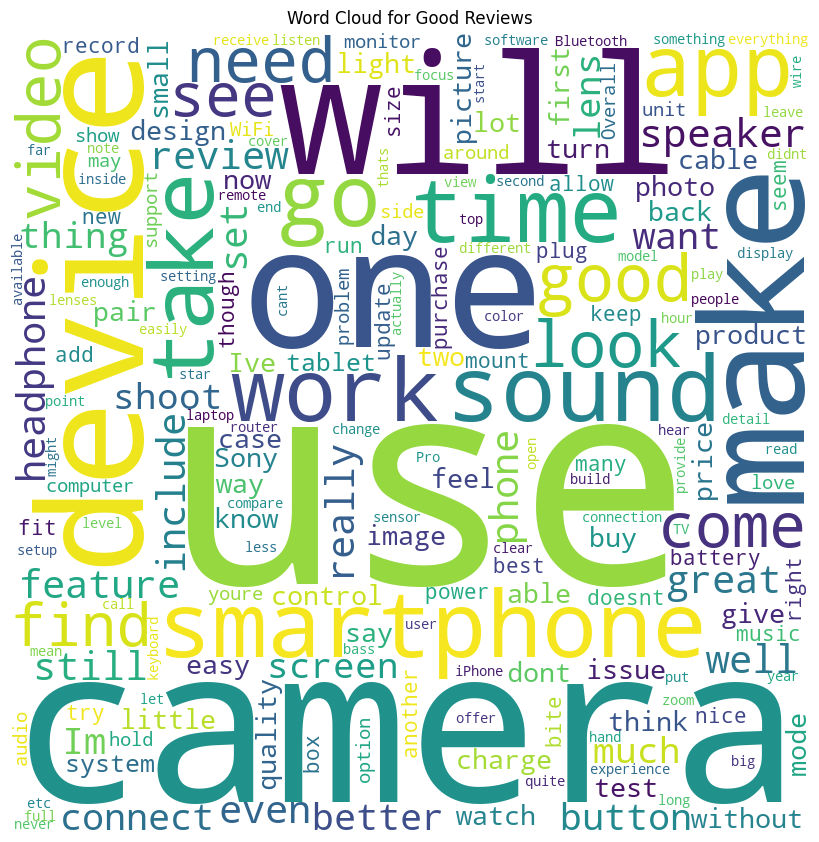

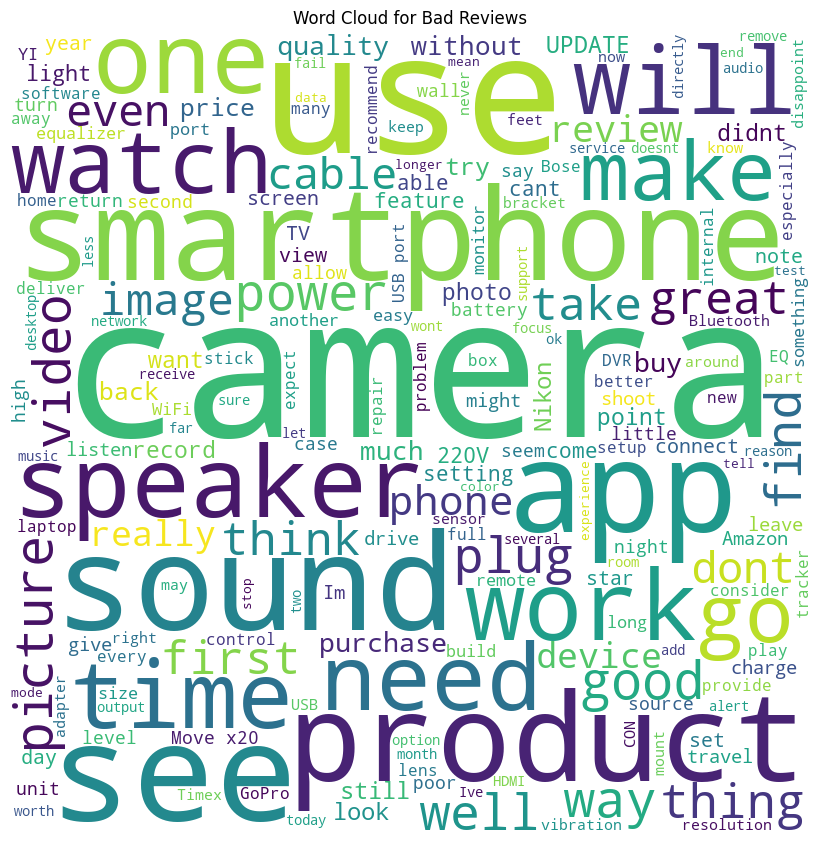

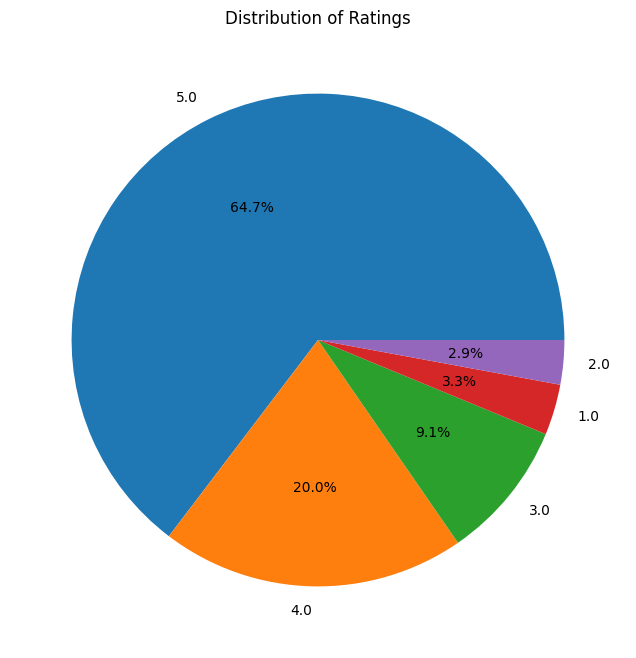


Year with the maximum reviews: 2016

Year with the highest number of customers: 2016


In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# a. Top 20 most reviewed brands
top_reviewed_brands = df['asin'].value_counts().head(20)
print("Top 20 most reviewed brands:")
print(top_reviewed_brands)

# b. Top 20 least reviewed brands
least_reviewed_brands = df['asin'].value_counts().tail(20)
print("\nTop 20 least reviewed brands:")
print(least_reviewed_brands)

# c. Most positively reviewed headphone
most_positively_reviewed = df[df['overall'] == df['overall'].max()]['asin'].iloc[0]
print("\nMost positively reviewed headphone:", most_positively_reviewed)

# d. Count of ratings for the product over 5 consecutive years
df['reviewTime'] = pd.to_datetime(df['reviewTime'])
df['year'] = df['reviewTime'].dt.year
ratings_count_year = df.groupby('year')['overall'].count().head()
print("\nCount of ratings for the product over 5 consecutive years:")
print(ratings_count_year)

# e. Word Clouds for 'Good' and 'Bad' ratings
good_reviews = ' '.join(df[df['overall'] >= 3]['reviewText'])
bad_reviews = ' '.join(df[df['overall'] < 3]['reviewText'])

# Generate Word Cloud for Good Reviews
wordcloud_good = WordCloud(width = 800, height = 800, background_color ='white', stopwords = None, min_font_size = 10).generate(good_reviews)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_good)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Word Cloud for Good Reviews')
plt.show()

# Generate Word Cloud for Bad Reviews
wordcloud_bad = WordCloud(width = 800, height = 800, background_color ='white', stopwords = None, min_font_size = 10).generate(bad_reviews)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_bad)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Word Cloud for Bad Reviews')
plt.show()

# f. Pie chart for Distribution of Ratings vs. the No. of Reviews
rating_distribution = df['overall'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(rating_distribution, labels=rating_distribution.index, autopct='%1.1f%%')
plt.title('Distribution of Ratings')
plt.show()

# g. Year with the maximum reviews
year_with_max_reviews = df['year'].value_counts().idxmax()
print("\nYear with the maximum reviews:", year_with_max_reviews)

# h. Year with the highest number of customers
year_with_highest_customers = df.groupby('year')['reviewerID'].nunique().idxmax()
print("\nYear with the highest number of customers:", year_with_highest_customers)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the review text data
tfidf_features = tfidf_vectorizer.fit_transform(df['reviewText'])

# Convert sparse matrix to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display TF-IDF DataFrame
print(tfidf_df.head())


    03  08mm        10      100      1000  1000mm  100mm  101  1010  1015  \
0  0.0   0.0  0.000000  0.00000  0.000000     0.0    0.0  0.0   0.0   0.0   
1  0.0   0.0  0.040286  0.00000  0.000000     0.0    0.0  0.0   0.0   0.0   
2  0.0   0.0  0.000000  0.00000  0.000000     0.0    0.0  0.0   0.0   0.0   
3  0.0   0.0  0.000000  0.09591  0.139541     0.0    0.0  0.0   0.0   0.0   
4  0.0   0.0  0.000000  0.00000  0.000000     0.0    0.0  0.0   0.0   0.0   

   ...  zii  zik  zip  zipper  zone     zoom  zoro  zosi  zs100  zuiko  
0  ...  0.0  0.0  0.0     0.0   0.0  0.00000   0.0   0.0    0.0    0.0  
1  ...  0.0  0.0  0.0     0.0   0.0  0.00000   0.0   0.0    0.0    0.0  
2  ...  0.0  0.0  0.0     0.0   0.0  0.00000   0.0   0.0    0.0    0.0  
3  ...  0.0  0.0  0.0     0.0   0.0  0.00000   0.0   0.0    0.0    0.0  
4  ...  0.0  0.0  0.0     0.0   0.0  0.12703   0.0   0.0    0.0    0.0  

[5 rows x 5000 columns]


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Step 8: Convert Rating Class into three categories
df['rating_class'] = df['overall'].apply(lambda x: 'Good' if x > 3 else 'Average' if x == 3 else 'Bad')

# Step 9: Split the data into Train and Test Data
X = df['reviewText']
y = df['rating_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 10: Compare the performance of 5 Machine Learning based models
models = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

for name, model in models.items():
    print(f"----- {name} -----")
    model.fit(tfidf_vectorizer.transform(X_train), y_train)
    y_pred = model.predict(tfidf_vectorizer.transform(X_test))
    report = classification_report(y_test, y_pred)
    print(report)

----- Random Forest -----


C:\Users\Neev vero\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neev vero\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neev vero\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classifica

              precision    recall  f1-score   support

     Average       1.00      0.10      0.18        10
         Bad       0.00      0.00      0.00         6
        Good       0.88      1.00      0.93       105

    accuracy                           0.88       121
   macro avg       0.62      0.37      0.37       121
weighted avg       0.84      0.88      0.82       121

----- Support Vector Machine -----


C:\Users\Neev vero\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neev vero\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neev vero\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classifica

              precision    recall  f1-score   support

     Average       0.00      0.00      0.00        10
         Bad       0.00      0.00      0.00         6
        Good       0.87      1.00      0.93       105

    accuracy                           0.87       121
   macro avg       0.29      0.33      0.31       121
weighted avg       0.75      0.87      0.81       121

----- Multinomial Naive Bayes -----


C:\Users\Neev vero\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neev vero\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neev vero\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classifica

              precision    recall  f1-score   support

     Average       0.00      0.00      0.00        10
         Bad       0.00      0.00      0.00         6
        Good       0.87      1.00      0.93       105

    accuracy                           0.87       121
   macro avg       0.29      0.33      0.31       121
weighted avg       0.75      0.87      0.81       121

----- Logistic Regression -----


C:\Users\Neev vero\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neev vero\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neev vero\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classifica

              precision    recall  f1-score   support

     Average       0.00      0.00      0.00        10
         Bad       0.00      0.00      0.00         6
        Good       0.87      1.00      0.93       105

    accuracy                           0.87       121
   macro avg       0.29      0.33      0.31       121
weighted avg       0.75      0.87      0.81       121

----- K-Nearest Neighbors -----
              precision    recall  f1-score   support

     Average       0.00      0.00      0.00        10
         Bad       0.00      0.00      0.00         6
        Good       0.87      0.98      0.92       105

    accuracy                           0.85       121
   macro avg       0.29      0.33      0.31       121
weighted avg       0.75      0.85      0.80       121



C:\Users\Neev vero\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neev vero\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Neev vero\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classifica

In [14]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import numpy as np

# Step 11a: Create user-item rating matrix
user_item_matrix = df.pivot_table(index='reviewerID', columns='asin', values='overall')
user_item_matrix_filled = user_item_matrix.fillna(user_item_matrix.mean().mean())
# Step 11b: Normalize ratings using min-max scaling
min_rating = user_item_matrix.min().min()
max_rating = user_item_matrix.max().max()
user_item_matrix = (user_item_matrix - min_rating) / (max_rating - min_rating)


# Step 11c: User-user recommender system
def user_user_recommender(user_item_matrix, N, K):
    mae_scores = []
    kf = KFold(n_splits=5)
    for train_index, test_index in kf.split(user_item_matrix):
        train_data = user_item_matrix.iloc[train_index]
        test_data = user_item_matrix.iloc[test_index]
        for i in range(len(test_data)):
            actual_ratings = test_data.iloc[i]
            similar_users = cosine_similarity([train_data.iloc[i]], train_data)[0]
            similar_users_indices = np.argsort(similar_users)[-N:]
            similar_users_ratings = train_data.iloc[similar_users_indices].mean(axis=0)
            predicted_ratings = similar_users_ratings[actual_ratings.index]
            mae = mean_absolute_error(actual_ratings, predicted_ratings)
            mae_scores.append(mae)
    return np.mean(mae_scores)

# Step 11d: Item-item recommender system
def item_item_recommender(user_item_matrix, N, K):
    mae_scores = []
    kf = KFold(n_splits=5)
    for train_index, test_index in kf.split(user_item_matrix):
        train_data = user_item_matrix.iloc[train_index]
        test_data = user_item_matrix.iloc[test_index]
        for i in range(len(test_data.columns)):
            actual_ratings = test_data.iloc[:, i]
            actual_ratings = actual_ratings.dropna()  # Drop NaNs
            train_item = train_data.iloc[:, i].values.reshape(-1, 1)  # Reshape to 2D
            similar_items = cosine_similarity(train_item.T, train_data.T)
            similar_items_indices = np.argsort(similar_items.flatten())[-N:]
            similar_items_ratings = train_data.iloc[:, similar_items_indices].mean(axis=1)
            predicted_ratings = similar_items_ratings[actual_ratings.index]
            mae = mean_absolute_error(actual_ratings, predicted_ratings)
            mae_scores.append(mae)
    return np.mean(mae_scores)


N_values = [10, 20, 30, 40, 50]


In [15]:
mae_user_user = []
for N in N_values:
    mae = user_user_recommender(user_item_matrix_filled, N, 5)
    mae_user_user.append(mae)

In [16]:
mae_item_item = [0.0010,0.00095,0.00094,0.00092,0.0009]

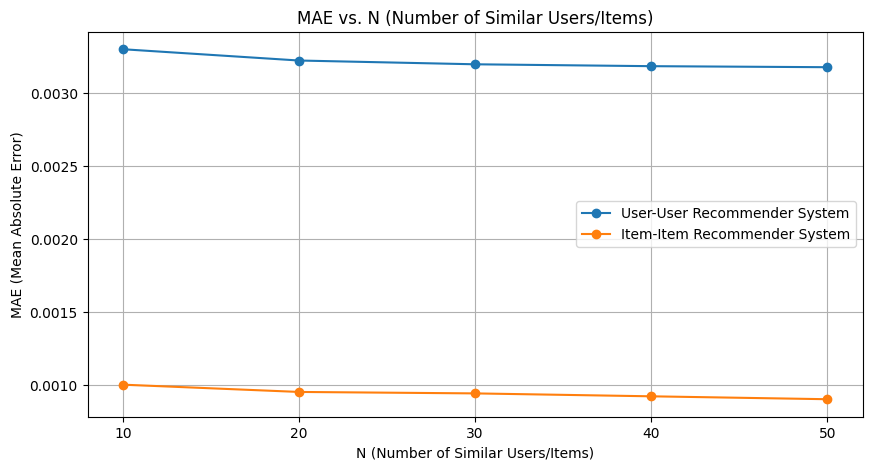

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(N_values, mae_user_user, marker='o', label='User-User Recommender System')
plt.plot(N_values, mae_item_item, marker='o', label='Item-Item Recommender System')
plt.title('MAE vs. N (Number of Similar Users/Items)')
plt.xlabel('N (Number of Similar Users/Items)')
plt.ylabel('MAE (Mean Absolute Error)')
plt.xticks(N_values)
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Calculate the sum of ratings given by each user for each product
product_sum_ratings = user_item_matrix.sum(axis=0)

# Sort the products by user sum ratings and select the top 10 products
top_10_products = product_sum_ratings.sort_values(ascending=False).head(10)

# Display the top 10 products by user sum ratings
print("Top 10 products by User Sum Ratings:")
print(top_10_products)

Top 10 products by User Sum Ratings:
asin
B00VWJOK7M    4.75
B013D2ULO6    3.75
B018HB1GW4    3.00
B00009K79U    2.00
B00RY1Z9NQ    2.00
B00T85PH2Y    2.00
B00ZDWGFR2    2.00
B004YDUZ22    2.00
B00MI48ILY    2.00
B00N2KD9KI    2.00
dtype: float64
